In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import sympy as sp
from sympy.matrices import Matrix 
from sympy import dsolve, Symbol, Eq, Function, integrate, diff, solve, symbols, linsolve, plot, exp, sin, cos, sqrt, Matrix, init_printing

In [42]:
n = 40
h = 1.5/(n-1)
lm = 3/(2*(53-49))
a = 0
b = 1.5

y = sp.Function('y')
t = sp.Symbol('\u03C4')
s = sp.Symbol('s')
x = Function('x')(s)
C1, C2 = symbols('C1, C2')

print('\u03BB',"=",lm)

λ = 0.375


In [43]:
y = 1.5*(s**2 + 40 - 53)

eq = lambda x: Eq(x-lm*integrate(s*(2*b - t)*x.subs(s,t), (t, s, b))-lm*integrate(t* (2*b - s)*x.subs(s,t), (t, a, s)) , y)
eq(x)

Eq(1.125*s*(1.0*Integral(0.333333333333333*τ*x(τ), (τ, s, 1.5)) + 1.0*Integral(-1.0*x(τ), (τ, s, 1.5))) + 1.125*(0.333333333333333*s - 1.0)*Integral(τ*x(τ), (τ, 0, s)) + x(s), 1.5*s**2 - 19.5)

In [44]:
dif_eq = Eq(diff(diff(x, s), s) + 2*lm*b*x, diff(diff(y, s), s))
dif_eq

Eq(1.125*x(s) + Derivative(x(s), (s, 2)), 3.0)

In [49]:
ans = dsolve(dif_eq, x).rhs
display(ans)
display(eq(ans).subs(s, a))
display(eq(ans).subs(s, b))

C1*sin(1.06066017177982*s) + C2*cos(1.06066017177982*s) + 2.66666666666667

Eq(1.0*C2 + 2.66666666666667, -19.5)

Eq(0.483834972902732*C1 - 0.305429214143746*C2 + 0.979166666666666, -16.125)

In [46]:
sett = linsolve([eq(ans).subs(s,a), eq(ans).subs(s,b)], (C1, C2))
C11 = list(list(sett)[0])[0].evalf()
C22 = list(list(sett)[0])[1].evalf()
print("C1 =", C11)
print("C2 =", C22)

C1 = -49.3443334689505
C2 = -22.1666666666667


In [47]:
result = C11*sin(1.0606601717798*s) + 2.666666666667 + C22*cos(1.0606601717798*s)

display(result)
print(np.array([result.subs(s,i) for i in np.linspace(a, b, 22)]))

-49.3443334689505*sin(1.0606601717798*s) - 22.1666666666667*cos(1.0606601717798*s) + 2.666666666667

[-19.4999999999997 -23.1712369051296 -26.6942404395932 -30.0487989524207
 -33.2156671703232 -36.1766766088069 -38.9148398056954 -41.4144477790669
 -43.6611601504844 -45.6420874164784 -47.3458648962857 -48.7627179316027
 -49.8845179642985 -50.7048291703675 -51.2189453825802 -51.4239170900043
 -51.3185683594996 -50.9035035821065 -50.1811040056235 -49.1555140732670
 -47.8326176467899 -46.2200042504657]


In [48]:
def K(s,t):
    if s>=0 and s<=t:
        return s*(3 - t)
    elif s>=t and s<=1.5:
            return t*(3 - s)
        
y_func = lambda s: 1.5*(s**2 + 40 - 53)

[-20.15414323 -21.44685254 -22.72260704 -23.98050971 -25.21967608
 -26.43923487 -27.63832857 -28.81611407 -29.97176324 -31.10446351
 -32.21341846 -33.29784835 -34.35699069 -35.39010077 -36.39645218
 -37.37533734 -38.32606797 -39.24797558 -40.14041195 -41.0027496
 -41.83438219 -42.63472498 -43.40321523 -44.1393126  -44.8424995
 -45.51228153 -46.14818774 -46.749771   -47.31660832 -47.84830116
 -48.34447566 -48.80478295 -49.22889938 -49.61652674 -49.96739247
 -50.28124989 -50.5578783  -50.7970832  -50.9986964  -51.16257615
 -51.28860721 -51.37670096 -51.42679548 -51.43885552 -51.41287263
 -51.34886505 -51.24687781 -51.10698261 -50.9292778  -50.71388835
 -50.4609657  -50.17068768 -49.8432584  -49.47890807 -49.07789289
 -48.64049481 -48.16702139 -47.65780553 -47.11320527 -46.53360354]


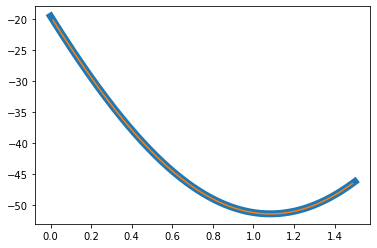

In [51]:
k = 60
net = np.linspace(a, b, k+1)
net = (net[1:] + net[:-1])/2
h = net[1] - net[0]

F = np.array([[int(i==j) - lm*K(net[i], net[j])*h for j in range(k)] for i in range(k)])
yy = y_func(net)
xx = np.linalg.inv(F)@yy
print(xx)
plt.plot(np.linspace(0, b, 1000), [result.subs(s, i) for i in np.linspace(0, b, 1000)], linewidth=7.0)
plt.plot(net, xx)